# Star Wars - Fan Survey
This notebook represents my work on a guided project, as provided by Dataquest.io.


While waiting for *Star Wars: The Force Awakens* to debut, the team at [FiveThirtyEight](https://fivethirtyeight.com) conducted a *Star Wars* fan survey.

In particular, the team wondered: **does the rest of America realize that "The Empire Strikes Back" is clearly the best?** 

They received 835 responses in total, collected into this [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this short project we will clean and encode the "star_wars.csv" dataset. We will then briefly explore the data at a high level.

## Data Import & Initial Look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style='darkgrid')
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data divides into two main categories. The first set of columns center around the demographics of the respondents and provide context for the subsequent survey questions. 

Potential key columns in terms of this analysis include:
* RespondentID - An anonymized ID for each respondent
* Gender
* Age
* Household Income
* Education
* Location (Census region)
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Formatting is currently inconsistent. For certain questions, the respondent originally had to check one or more boxes to indicate their answers. This type of data is difficult to represent in columnar format. As a result, the data set needs substantial cleaning to prep it for analysis.

## Data Cleaning
### Removal of invalid rows
First, we will remove any obviously invalid rows. RespondentID is blank in some rows, when each row of data should be firmly attached to a valid RespondentID.
As such we will remove any row where the RespondentID is NaN.

In [4]:
# Removal of all rows in which RespondentID is blank
# Followed by a quick check to ensure that the operation was successful
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

We will now convert values in the below two columns (shown in **bold** text) from 'Yes' / No' to 'True / False'. This will make it easier for us to select rows without performing a string comparison.

We will not adjust NaN values, which represent the case when a respondent had chosen not to answer a question. This choice could have been intentional or unintentional.

** Column 1: Have you seen any of the 6 films in the Star Wars franchise? **

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# Conversion of 'Yes / No' values to 'True / False'
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = (
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].
        map({'Yes': True, 'No': False}))

In [7]:
# A quick check on the converted values to ensure we have no 'Yes' 'No' values left.
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

** Column 2: Do you consider yourself to be a fan of the Star Wars film franchise? **

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
# Conversion of 'Yes / No' values to 'True / False'
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = (
    star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].
        map({'Yes': True, 'No': False}))

In [10]:
# A quick check on the converted values to ensure we have no 'Yes' 'No' values left.
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Simplify a series of 'boolean' columns

From the initial data six columns as a whole represent a single checkbox question.
> Which of the following Star Wars films have you seen? 
> Please select all that apply.

The original columns for this question are:
* Which of the following Star Wars films have you seen? Please select all that apply - Whether or not the respondent saw *Star Wars: Episode I The Phantom Menace*.
* Unnamed: 4 - Whether or not the respondent saw *Star Wars: Episode II Attack of the Clones*.
* Unnamed: 5 - Whether or not the respondent saw *Star Wars: Episode III Revenge of the Sith*.
* Unnamed: 6 - Whether or not the respondent saw *Star Wars: Episode IV A New Hope*.
* Unnamed: 7 - Whether or not the respondent saw *Star Wars: Episode V The Empire Strikes Back*.
* Unnamed: 8 - Whether or not the respondent saw *Star Wars: Episode VI Return of the Jedi*.

The current values for each column consist of either the particular movie name or **NaN**, which means either the respondent did not answer or did not see the movie. We will assume that they did not see the movie.

For each column we will convert the answers to the boolean values of True and False.

But first, we will rename column names to something shorter and easier to work with.  'Star Wars: Episode I The Phantom Menace' will simply be 'seen_1', 'Unnamed: 4' will be 'seen_2' and so forth.

In [11]:
# Conversion of the above-stated column names to a shorter alternative
star_wars.rename({'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                  'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4',
                  'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'},
                 axis=1, inplace=True)
star_wars.columns
# Note columns 4 to 9 now have the 'seen_' prefix.

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [12]:
# Pull the first row of renamed columns to ensure that the column names are now correct
movies = star_wars.loc[1, 'seen_1': 'seen_6'].values
star_wars.loc[1, 'seen_1': 'seen_6']

seen_1        Star Wars: Episode I  The Phantom Menace
seen_2     Star Wars: Episode II  Attack of the Clones
seen_3     Star Wars: Episode III  Revenge of the Sith
seen_4               Star Wars: Episode IV  A New Hope
seen_5    Star Wars: Episode V The Empire Strikes Back
seen_6        Star Wars: Episode VI Return of the Jedi
Name: 1, dtype: object

Now that the column names have been standardized, we will work on adjusting the column values to **True** and **False** values.

**seen_1** column

In [13]:
# Quick check on the current values
star_wars.seen_1.value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64

In [14]:
# Map the current values to True and False
star_wars.seen_1 = star_wars.seen_1.map({'Star Wars: Episode I  The Phantom Menace': True, np.nan: False})

In [15]:
# Check that the converted values are limited to True and False
star_wars.seen_1.value_counts(dropna=False)

True     673
False    513
Name: seen_1, dtype: int64

**seen_2** column

In [16]:
# Quick check on current values
star_wars.seen_2.value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64

In [17]:
# Map the current values to True and False
star_wars.seen_2 = star_wars.seen_2.map({'Star Wars: Episode II  Attack of the Clones': True, np.nan: False})

In [18]:
# Check that the converted values are limited to True and False
star_wars.seen_2.value_counts(dropna=False)

False    615
True     571
Name: seen_2, dtype: int64

**seen_3** column

In [19]:
# Quick check on current values
star_wars.seen_3.value_counts(dropna=False)

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64

In [20]:
# Map the current values to True and False
star_wars.seen_3 = star_wars.seen_3.map({'Star Wars: Episode III  Revenge of the Sith': True, np.nan: False})

In [21]:
# Check that the converted values are limited to True and False
star_wars.seen_3.value_counts(dropna=False)

False    636
True     550
Name: seen_3, dtype: int64

**seen_4** column

In [22]:
# Quick check on current values
star_wars.seen_4.value_counts(dropna=False)

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64

In [23]:
# Map the current values to True and False
star_wars.seen_4 = star_wars.seen_4.map({'Star Wars: Episode IV  A New Hope': True, np.nan: False})

In [24]:
# Check that the converted values are limited to True and False
star_wars.seen_4.value_counts(dropna=False)

True     607
False    579
Name: seen_4, dtype: int64

**seen_5** column

In [25]:
# Quick check on current values
star_wars.seen_5.value_counts(dropna=False)

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64

In [26]:
# Map the current values to True and False
star_wars.seen_5 = star_wars.seen_5.map({'Star Wars: Episode V The Empire Strikes Back': True, np.nan: False})

In [27]:
# Check that the converted values are limited to True and False
star_wars.seen_5.value_counts(dropna=False)

True     758
False    428
Name: seen_5, dtype: int64

**seen_6** column

In [28]:
# Quick check on current values
star_wars.seen_6.value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64

In [29]:
# Map the current values to True and False
star_wars.seen_6 = star_wars.seen_6.map({'Star Wars: Episode VI Return of the Jedi': True, np.nan: False})

In [30]:
# Check that the converted values are limited to True and False
star_wars.seen_6.value_counts(dropna=False)

True     738
False    448
Name: seen_6, dtype: int64

In [31]:
# Pull first row of the 6 renamed columns to ensure that the new values are correct
star_wars.loc[1, 'seen_1': 'seen_6']

seen_1    True
seen_2    True
seen_3    True
seen_4    True
seen_5    True
seen_6    True
Name: 1, dtype: object

### Clean up the 'rank the Star Wars movie' columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite (6) to most favorite (1). Each of the columns can contain the value: 1, 2, 3, 4, 5, 6, or NaN.

The columns are:
* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked *Star Wars: Episode I The Phantom Menace*.
* Unnamed: 10 - How much the respondent liked *Star Wars: Episode II Attack of the Clones*.
* Unnamed: 11 - How much the respondent liked *Star Wars: Episode III Revenge of the Sith*.
* Unnamed: 12 - How much the respondent liked *Star Wars: Episode IV A New Hope*.
* Unnamed: 13 - How much the respondent liked *Star Wars: Episode V The Empire Strikes Back*.
* Unnamed: 14 - How much the respondent liked *Star Wars: Episode VI Return of the Jedi*.

We will first convert each column to a numeric data type.  We will then rename each column to a more descriptive name, such as 'ranking_1'.

In [32]:
# Quick check of the current state of the columns.
star_wars[star_wars.columns[9:15]][0:2]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Conversion of column type to float, along with a quick confirmation of such
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null float64
Unnamed: 10                                                                                                                                      836 non-null float64
Unnamed: 11                                                                                                                                      835 non-null float64
Unnamed: 12                                                                                                                                      836 non-null float64
Unnamed: 13                                                                                                                                      836 non-null float64
Unnamed: 14                                                     

In [34]:
# Rename of columns to ranking_1, ranking_2, and so forth.
star_wars = star_wars.rename({'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                             'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3',
                             'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5',
                             'Unnamed: 14': 'ranking_6'}, axis=1)

In [35]:
# A quick check of the converted column names
star_wars[star_wars.columns[9:15]].columns

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Data Exploration
### Identify the highest ranked movie
Now that we have cleaned up the ranking columns, we can find the highest-ranked movie more simply. To do this we will find the mean of each of the ranking columns.

*Please remember that a lower ranking is better!*

In [36]:
mean_rank = star_wars[star_wars.columns[9:15]].mean()
mean_rank

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

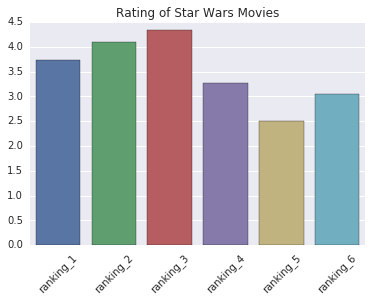

In [37]:
ax = sns.barplot(x=mean_rank.index, y=mean_rank.values)
ax.set_title('Rating of Star Wars Movies')
plt.xticks(rotation=45)
plt.show()

'ranking_5' has been identified as the clear fan favorite, with a mean ranking of 2.51.  That movie corresponds to: **Star Wars: Episode V The Empire Strikes Back** and happens to be the author's personal favorite, especially given its dramatic ending that leaves the audience hanging!

It is interesting to compare the rankings to each movie's respective production budget and box office sales figures, found [here](https://www.the-numbers.com/movies/franchise/Star-Wars#tab=summary). We will leave that as a side-exercise for the reader.

### Identify the most watched movie
Our columns - 'seen_1' to 'seen_6' contain boolean values. When we call methods such as sum(), the True values conveniently convert over to 1. Thus, from our survey results we can calculate how often a given movie was seen.

In [38]:
movie_seen_count = star_wars[star_wars.columns[3:9]].sum()
movie_seen_count

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

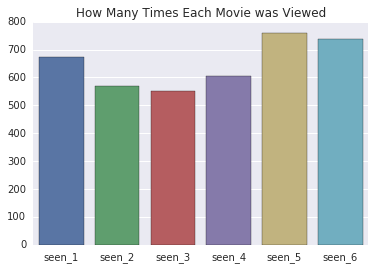

In [39]:
ax = sns.barplot(x=movie_seen_count.index, y=movie_seen_count.values)
ax.set_title('How Many Times Each Movie was Viewed')
plt.show()

There may be a bias in the ratings in that 'seen_5' - Star Wars: Episode V The Empire Strikes Back - was also the most viewed movie. It is possible that these particular survey respondents began their Star Wars journey with 'The Empire Strikes Back' and thus hold a particular affection for the movie.

### Identify differences in survey segments
We now know which movies the survey population as a whole ranked the highest. Now let us examine how certain segments of the survey population responded.

There are several columns that segment our data into groups. Three examples are:
* Do you consider yourself to be a fan of the Star Wars film franchise?
* Do you consider yourself to be a fan of the Star Trek franchise? 
* Gender - Male or Female

Gender may constitute the most interesting survey segment. We will redo the above analysis segmenting results by gender.

For gender comparison purposes we will eventually switch from count of movies seen to percentage of a gender's respondents that saw a given movie.

In [40]:
star_wars_males = star_wars[star_wars['Gender'] == 'Male']
star_wars_females = star_wars[star_wars['Gender'] == 'Female']

print('The number of male respondents is:', len(star_wars_males))
print('The number of female respondents is:', len(star_wars_females))

print('\nGender seems fairly evenly divided in number.')
print('There exists an adequate sample size in both segments.')

The number of male respondents is: 497
The number of female respondents is: 549

Gender seems fairly evenly divided in number.
There exists an adequate sample size in both segments.


#### Male Segment

In [41]:
males_mean_rank = star_wars_males[star_wars_males.columns[9:15]].mean()
males_mean_rank

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

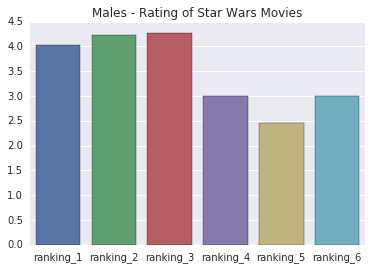

In [42]:
ax = sns.barplot(x=males_mean_rank.index, y=males_mean_rank.values)
ax.set_title('Males - Rating of Star Wars Movies')
plt.show()

With the male segment we see an even clearer preference for movies 4 through 6. The highest ranked film is still 'The Empire Strikes Back' (ranking_5) with a rating of 2.45.

In [43]:
males_movie_seen_percent = (star_wars_males[star_wars_males.columns[3:9]].sum() / len(star_wars_males)) * 100
males_movie_seen_percent

seen_1    72.635815
seen_2    64.989940
seen_3    63.782696
seen_4    68.812877
seen_5    78.873239
seen_6    77.867203
dtype: float64

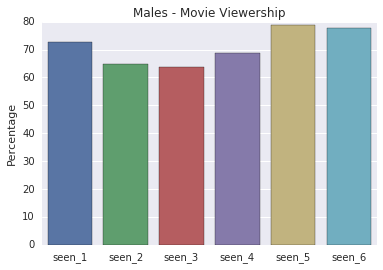

In [44]:
ax = sns.barplot(x=males_movie_seen_percent.index, y=males_movie_seen_percent.values)
ax.set_title('Males - Movie Viewership')
ax.set_ylabel('Percentage')

Out of 497 male survey respondents, 397 (79%) had seen 'The Empire Strikes Back' (seen_5). Likewise, 387 (78%) had seen 'Return of the Jedi' (seen_6). Interesting to note that these two movies are also ranked the highest by the male survey respondents.

Now we switch over to the female segment of the survey respondent population.

#### Female Segment

In [45]:
females_mean_rank = star_wars_females[star_wars_females.columns[9:15]].mean()
females_mean_rank

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

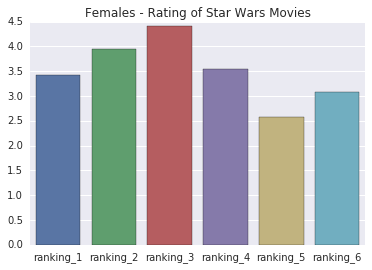

In [46]:
ax = sns.barplot(x=females_mean_rank.index, y=females_mean_rank.values)
ax.set_title('Females - Rating of Star Wars Movies')
plt.show()

In comparison to the male survey respondents, the female survey respondents seem less fond of 'ranking_4' - the original Star Wars film. Men rated that movie at 2.99, versus women at 3.54. 

Their exists a clear consensus with the top ranked film, 'The Empire Strikes Back' (ranking_5), with a rating of 2.56.

In [47]:
females_movie_seen_percent = (star_wars_females[star_wars_females.columns[3:9]].sum() / len(star_wars_females)) * 100
females_movie_seen_percent

seen_1    54.280510
seen_2    43.169399
seen_3    40.437158
seen_4    46.448087
seen_5    64.298725
seen_6    61.566485
dtype: float64

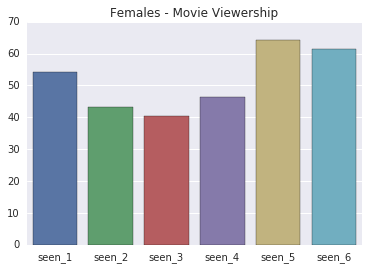

In [48]:
ax = sns.barplot(x=females_movie_seen_percent.index, y=females_movie_seen_percent.values)
ax.set_title('Females - Movie Viewership')
plt.show()

More women survey respondents have seen 'The Empire Strikes Back' than the other films in the series. The exact figure is 64%, or 351 women out of 549 female survey respondents.

From the data we see that the male survey respondents are more likely to have seen any given Star Wars. For men, the percentage that have watched a given Star Wars film ranges from 64% to 79%. For females, the same percentage ranges from 40% to 64%. 

Along with a higher sample representation, males will have had a larger influence on the mean score for each movie.

Naturally, greater analysis can be run on this data set. For example, we could further segment data based on Education and Location.

## Conclusion
I will conclude with my own bias that **The Empire Strikes Back** clearly is the best film out of the current Star Wars series.